# Heart Disease

Heart Disease | Prediction
- | -
<img src="health-robot.jpg" width="240px"> | <img src="heart-attack.jpg" width="300px"> 

# Importando las librerias

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import sys

import sklearn
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

from keras.models import Sequential
from keras.layers.core import Dense

from IPython.display import HTML

# Cargando los datos

In [3]:
trainx = pd.read_csv("./heart.csv")

In [4]:
trainx.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
trainx.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Significado de los atributos
<ul>
    <li>
        <h3>Age:</h3>
        Edad de la persona
    </li>
    <li>
        <h3>Sex:</h3>
        Sexo de la persona (1 para hombre, 0 para mujer)
    </li>
    <li>
        <h3>cp:</h3>
        Chest pain experienced - Experencia de dolor en el pecho
        0: angino tipico <br>
        1: angina atipico<br>
        2: Dolor no anginal<br>
        3: asymptomatico       
    </li>
        <li>
        <h3>trestbps:</h3>
        La presión arterial en reposo de la persona
    </li>
        <li>
        <h3>chol:</h3>
        Colesterol de la persona (mg/dl)
    </li>
        <li>
        <h3>fbs:</h3>
        El azúcar en sangre de la persona en ayunas (> 120 mg/dl, 1: true; 0: false) 
    </li>
        <li>
        <h3>restecg:</h3>
        resting electrocardiographic results <br>
        0: normal<br>
        1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)<br>
        2: showing probable or definite left ventricular hypertrophy by Estes' criteria
    </li>
        <li>
        <h3>thalach:</h3>
        El registro de la frecuencia cardíaca máxima de la persona
    </li>
        <li>
        <h3>Exang:</h3>
         Angina inducida por ejercicio (1: si; 0: no)
    </li>
    <li>
        <h3>oldpeak:</h3>
         Depresión del ST inducida por el ejercicio relativo al descanso
    </li>
    <li>
        <h3>slope:</h3>
         la pendiente del segmento pico del ejercicio ST<br>
         0: pendiente ascendente<br>
         1: plano<br>
         2: pendiente descendente<br>
    </li>
    <li>
        <h3>ca:</h3>
         El número de vasos principales (0-3)
    </li>
    <li>
        <h3>thal:</h3>
         Trastorno sanguíneo conocido como talasemia<br>
         3: normal<br>
         6: defecto fijo<br>
         7: efecto reversible
    </li>
       <li>
        <h3>Desease:</h3>
         0: No Enfermo<br>
         1: Enfermo
    </li> 
    
</ul>

In [6]:
# NAS
# trainx["age"] = trainx["age"].fillna(trainx["age"].median())
# trainx["cp"] = trainx["cp"].fillna(trainx["cp"].median())
# trainx["trestbps"] = trainx["trestbps"].fillna(trainx["trestbps"].median())
# trainx["chol"] = trainx["chol"].fillna(trainx["chol"].median())
# trainx["thalach"] = trainx["thalach"].fillna(trainx["thalach"].median())
# trainx["oldpeak"] = trainx["oldpeak"].fillna(trainx["oldpeak"].median())

In [7]:
# Category types
# trainx['sex'] = trainx['sex'].astype('category')
# trainx['cp'] = trainx['cp'].astype('category')
# trainx['fbs'] = trainx['fbs'].astype('category')
# trainx['restecg'] = trainx['restecg'].astype('category')
# trainx['exang'] = trainx['exang'].astype('category')
# trainx['slope'] = trainx['slope'].astype('category')
# trainx['thal'] = trainx['thal'].astype('category')
# trainx['ca'] = trainx['ca'].astype('category')
# trainx['target'] = trainx['target'].astype('category')

print(trainx.dtypes)

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


<h3>Datos completos</h3>

In [34]:
print("NaNs")
print(trainx.isna().any().any())
print("------------------")
print("Nulls")
print(trainx.isnull().any().any())

NaNs
False
------------------
Nulls
False


# Gráficas de los datos

<h2>Histogramas</h2>

Variables:

<ul>
    <li>
    Age
    </li>
    <li>
    Trestbps
    </li>
    <li>
    chol
    </li>
    <li>
    Thalach
    </li>
    <li>
    Oldpeak
    </li>
</ul>

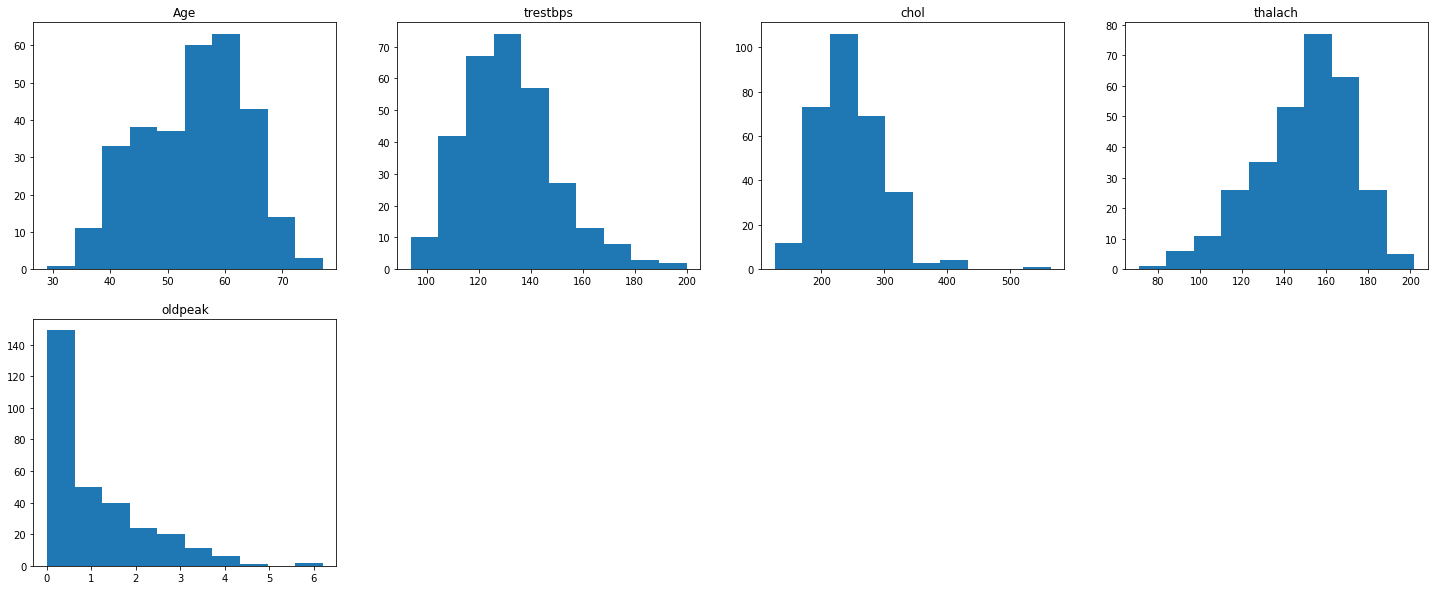

In [9]:
counts, bins = np.histogram(trainx["age"])
counts2, bins2 = np.histogram(trainx["trestbps"])
counts3, bins3 = np.histogram(trainx["chol"])
counts4, bins4 = np.histogram(trainx["thalach"])
counts5, bins5 = np.histogram(trainx["oldpeak"])

plt.figure(figsize=(25,10))

plt.subplot(2, 4, 1)
plt.hist(bins[:-1], bins, weights=counts)
plt.title('Age')
plt.ylabel('')

plt.subplot(2, 4, 2)
plt.hist(bins2[:-1], bins2, weights=counts2)
plt.title('trestbps')
plt.ylabel('')

plt.subplot(2, 4, 3)
plt.hist(bins3[:-1], bins3, weights=counts3)
plt.title('chol')
plt.ylabel('')

plt.subplot(2, 4, 4)
plt.hist(bins4[:-1], bins4, weights=counts4)
plt.title('thalach')
plt.ylabel('')

plt.subplot(2, 4, 5)
plt.hist(bins5[:-1], bins5, weights=counts5)
plt.title('oldpeak')
plt.ylabel('')


plt.show()

<h2>Tortas</h2>

Variables:

<ul>
    <li>
    Sex
    </li>
    <li>
    Fbs
    </li>
    <li>
    Restecg
    </li>
    <li>
    Exang
    </li>
    <li>
    Thal
    </li>
    <li>
    Cp
    </li>
    <li>
    Slope
    </li>
    <li>
    Ca
    </li>
    <li>
    Target
    </li>
</ul>

Text(0.5,1,'Target')

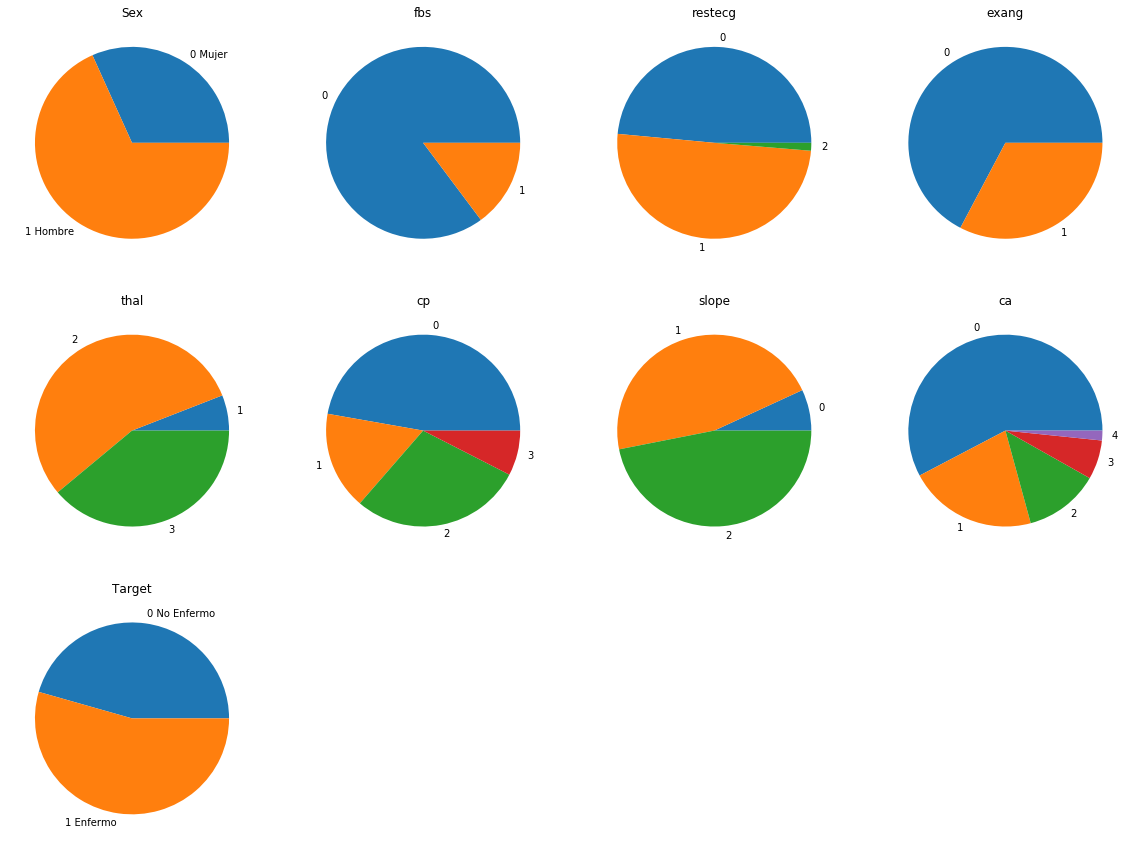

In [15]:
plt.figure(figsize=(20,15))

plt.subplot(3, 4, 1)
labels = ["0 Mujer", "1 Hombre"]
values = [trainx["sex"].count() - trainx["sex"].sum(), trainx["sex"].sum()]
plt.pie(values, labels=labels)
plt.title('Sex')

plt.subplot(3, 4, 2)
labels = ["0", "1"]
values = [trainx["fbs"].count() - trainx["fbs"].sum(), trainx["fbs"].sum()]
plt.pie(values, labels=labels)
plt.title('fbs')

plt.subplot(3, 4, 3)
labels = ["0", "1", "2"]
values = [trainx["restecg"][trainx["restecg"]==0].count(), trainx["restecg"][trainx["restecg"]==1].count(), trainx["restecg"][trainx["restecg"]==2].count()]
plt.pie(values, labels=labels)
plt.title('restecg')

plt.subplot(3, 4, 4)
labels = ["0", "1"]
values = [trainx["exang"].count() - trainx["exang"].sum(), trainx["exang"].sum()]
plt.pie(values, labels=labels)
plt.title('exang')

plt.subplot(3, 4, 5)
labels = ["1", "2", "3"]
values = [trainx["thal"][trainx["thal"]==1].count(), trainx["thal"][trainx["thal"]==2].count(), trainx["thal"][trainx["thal"]==3].count()]
plt.pie(values, labels=labels)
plt.title('thal')

plt.subplot(3, 4, 6)
labels = ["0", "1", "2", "3"]
values = [trainx["cp"][trainx["cp"]==0].count(), trainx["cp"][trainx["cp"]==1].count(), trainx["cp"][trainx["cp"]==2].count(), trainx["cp"][trainx["cp"]==3].count()]
plt.pie(values, labels=labels)
plt.title('cp')

plt.subplot(3, 4, 7)
labels = ["0", "1", "2"]
values = [trainx["slope"][trainx["slope"]==0].count(), trainx["slope"][trainx["slope"]==1].count(), trainx["slope"][trainx["slope"]==2].count()]
plt.pie(values, labels=labels)
plt.title('slope')

plt.subplot(3, 4, 8)
labels = ["0", "1", "2", "3", "4"]
values = [trainx["ca"][trainx["ca"]==0].count(), trainx["ca"][trainx["ca"]==1].count(), trainx["ca"][trainx["ca"]==2].count(), trainx["ca"][trainx["ca"]==3].count(), trainx["ca"][trainx["ca"]==4].count()]
plt.pie(values, labels=labels)
plt.title('ca')

plt.subplot(3, 4, 9)
labels = ["0 No Enfermo", "1 Enfermo"]
values = [trainx["target"][trainx["target"]==0].count(), trainx["target"][trainx["target"]==1].count()]
plt.pie(values, labels=labels)
plt.title('Target')



# División del conjunto de datos
<h2>80% para entrenamiento y 20% para pruebas</h2>


In [37]:
# atributos y target
features = trainx[["age", "cp", "trestbps", "chol", "thalach", "oldpeak", "sex", "fbs", "restecg", "exang", "thal", "slope", "ca"]].values
target = trainx["target"].values

# Diviendo datos para entrenar es probar
trainX, testX, trainY, testY = train_test_split(features, target, test_size=0.2)
print(trainX.shape, trainY.shape)
print(testX.shape, testY.shape)

((242, 13), (242,))
((61, 13), (61,))


In [17]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

# Árbol de decisión

In [131]:
model1 = tree.DecisionTreeClassifier(max_depth = 5, min_samples_split = 2)
#model1 = tree.DecisionTreeClassifier(max_depth = 5, min_samples_split = 5, random_state = 1)
# model1 = tree.DecisionTreeClassifier()

model1 = model1.fit(trainX, trainY)

#Print the score on the train data
print("Train: " + str(model1.score(trainX, trainY)))
#Print the score on the test data
print("Test: " + str(model1.score(testX, testY)))

# Para árboles
# print(confusion_matrix(model1.predict(testX), testY))

# y_pred = model1.predict(testX)
# print(y_pred)

# print("Accuracy:",metrics.accuracy_score(testY, y_pred))

Train: 0.9338842975206612
Test: 0.7377049180327869


<h2>Matriz de confusión</h2>

In [132]:
confusion_matrix(model1.predict(testX), testY)

array([[18,  4],
       [12, 27]])

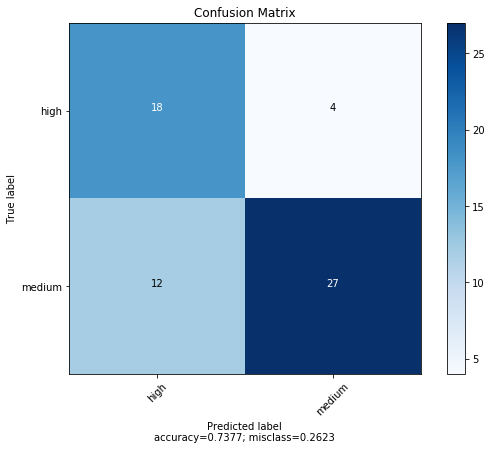

In [133]:
plot_confusion_matrix(cm = confusion_matrix(model1.predict(testX), testY), 
                      normalize    = False,
                      target_names = ['high', 'medium'],
                      title        = "Confusion Matrix")

# Gráfica de Importancias y Árbol de decisión


(array([0.03403631, 0.32638874, 0.01306396, 0.        , 0.05800945,
       0.09392887, 0.01749637, 0.02449492, 0.04964035, 0.01917872,
       0.13092695, 0.08953194, 0.14330342]), 0.8943894389438944)


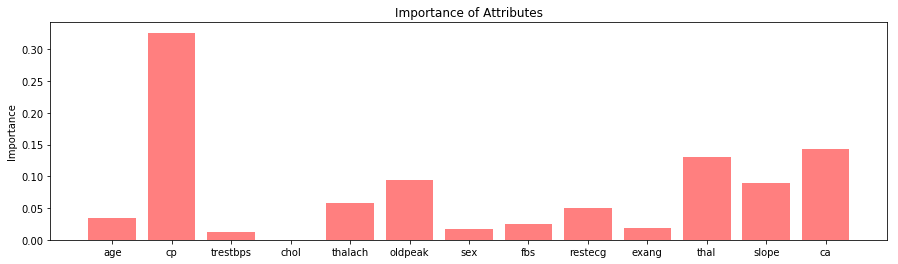

In [145]:
importances = model1.feature_importances_
print(importances, model1.score(features, target))

features_col = ["age", "cp", "trestbps", "chol", "thalach", "oldpeak", "sex", "fbs", "restecg", "exang", "thal", "slope", "ca"]

y_values = np.arange(len(features_col))

plt.figure(figsize=(15,4))
plt.bar(y_values, importances, align='center', alpha=0.5, color='r')
plt.xticks(y_values, features_col)
plt.ylabel('Importance')
plt.title('Importance of Attributes')

plt.show()

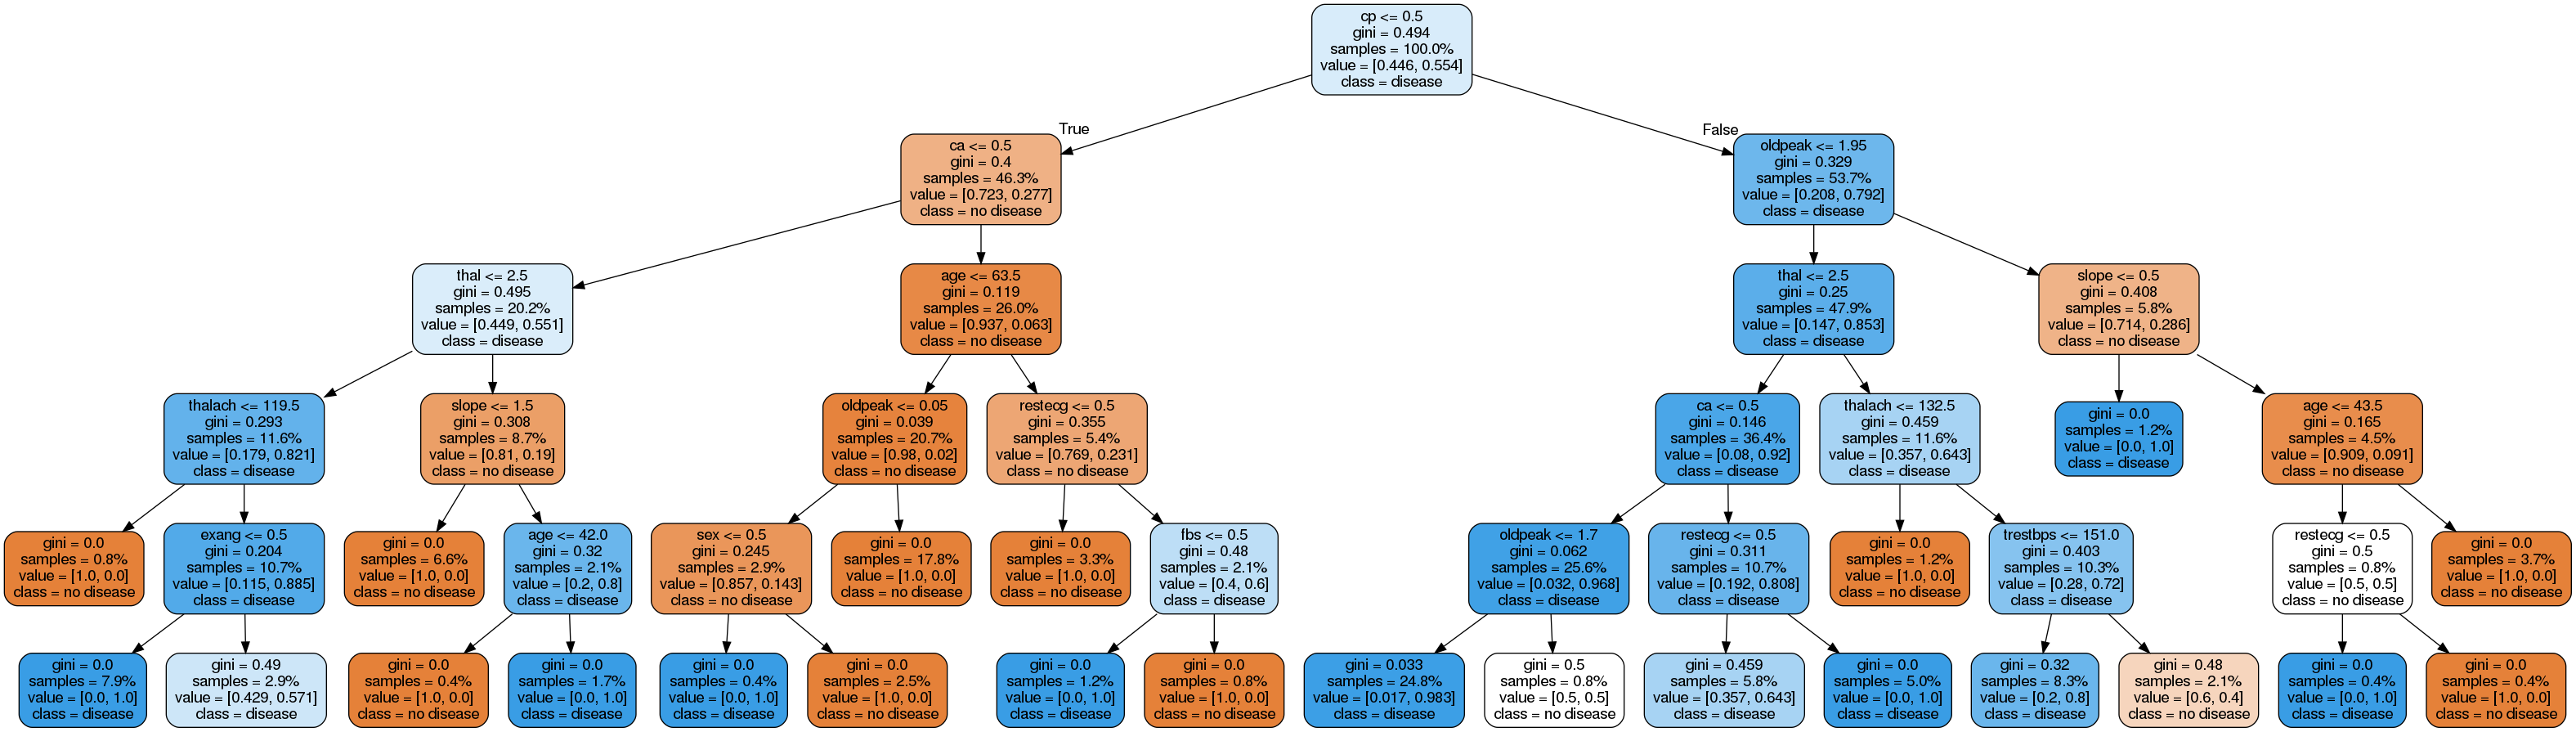

In [146]:

# c = -1;
# for i in importances:
#     c = c + 1
#     if(i == 0.0):
#         features_col.remove(features_col[c])
#         c = c - 1
    
        
        
# print(features_col)

y_train_str = trainY.astype('str')
y_train_str[y_train_str == '0'] = 'no disease'
y_train_str[y_train_str == '1'] = 'disease'

dot_data = StringIO()
export_graphviz(model1, out_file = dot_data, filled = True, rounded = True, proportion = True,
                feature_names = features_col, 
                class_names = y_train_str)


graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())


<h2>Interpretación</h2>

El arbol es algo muy facil de entender y graficar

# Naive Bayes

In [153]:
model2 = gnb.fit(trainX, trainY)


#Print the score on the train data
print("Train: " + str(model2.score(trainX, trainY)))
#Print the score on the test data
print("Test: " + str(model2.score(testX, testY)))

# y_pred2 = model2.predict(testX)
# print(y_pred2)
# print("Accuracy: ",metrics.accuracy_score(testY, y_pred2))
# print(metrics.classification_report(testY, y_pred2))
# from sklearn.metrics import confusion_matrix



Train: 0.8512396694214877
Test: 0.7704918032786885


<h2>Matriz de confusión</h2>

In [143]:
confusion_matrix(model2.predict(testX), testY)

array([[19,  3],
       [11, 28]])

<h2>Interpretación</h2>

# Red Neuronal

In [144]:
# NN is sensitive to data scale. We must normilize
scaler = StandardScaler()  
trainXX = trainX.copy()
testXX = testX.copy()
# Don't cheat - fit only on training data
scaler.fit(trainX)  
trainXX = scaler.transform(trainXX)  
# apply same transformation to test data
testXX = scaler.transform(testXX)  

model3 = MLPClassifier(solver='lbfgs', alpha=1e-3, activation = 'relu', max_iter=5000,
                     hidden_layer_sizes = (1), random_state=1, verbose = True)

model3.fit(trainXX, trainY)                         

#Print the score on the train data
print("On training")
print(model3.score(trainXX, trainY))
print(confusion_matrix(model3.predict(trainXX), trainY))

#Print the score on the test data
print("\nOn test")
print(model3.score(testXX, testY))
print(confusion_matrix(model3.predict(testXX), testY))

On training
0.8801652892561983
[[ 88   9]
 [ 20 125]]

On test
0.7868852459016393
[[20  3]
 [10 28]]


In [28]:
network = Sequential()
network.add(Dense(13, input_dim=13, activation='sigmoid'))
network.add(Dense(1, input_dim=13, activation='sigmoid'))
network.add(Dense(13, input_dim=13, activation='sigmoid'))


# network.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
network.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['binary_accuracy'])
# network.compile(loss='mean_squared_error', optimizer='adam', metrics=['binary_accuracy'])
# network.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_accuracy'])


network.fit(trainX, trainY, epochs=1000)

scoreT = network.evaluate(testX, testY)
scoreE = network.evaluate(trainX, trainY)

print("Score del test")
print("%s: %.2f%%" % (network.metrics_names[1], scoreT[1]*100))
print("Score del entrenamiento")
print("%s: %.2f%%" % (network.metrics_names[1], scoreE[1]*100))

# predictions = network.predict_classes(testX)










Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/1000
242/242 [==============================] - 1s 5ms/step - loss: 2.5699 - binary_accuracy: 0.4975
Epoch 2/1000
242/242 [==============================] - 0s 39us/step - loss: 2.5592 - binary_accuracy: 0.4975
Epoch 3/1000
242/242 [==============================] - 0s 45us/step - loss: 2.5496 - binary_accuracy: 0.4975
Epoch 4/1000
242/242 [==============================] - 0s 45us/step - loss: 2.5399 - binary_accuracy: 0.4975
Epoch 5/1000
242/242 [==============================] - 0s 50us/step - loss: 2.5305 - binary_accuracy: 0.4975
Epoch 6/1000
242/242 [==============================] - 0s 58us/step - loss: 2.5214 - binary_accuracy: 0.4975
Epoch 7/1000
242/242 [==============================] - 0s 53us/step - loss: 2.5121 - binary_accuracy: 0.4975
Epoch 8/1000
242/242 [==============================] - 0s 40us/step - loss: 2.5028 - binary_accuracy: 0.4975
Epoch 9/1000
242/242 

242/242 [==============================] - 0s 36us/step - loss: 1.2268 - binary_accuracy: 0.4771
Epoch 134/1000
242/242 [==============================] - 0s 37us/step - loss: 1.2212 - binary_accuracy: 0.4771
Epoch 135/1000
242/242 [==============================] - 0s 30us/step - loss: 1.2158 - binary_accuracy: 0.4771
Epoch 136/1000
242/242 [==============================] - 0s 46us/step - loss: 1.2104 - binary_accuracy: 0.4771
Epoch 137/1000
242/242 [==============================] - 0s 42us/step - loss: 1.2050 - binary_accuracy: 0.4771
Epoch 138/1000
242/242 [==============================] - 0s 36us/step - loss: 1.1997 - binary_accuracy: 0.4771
Epoch 139/1000
242/242 [==============================] - 0s 49us/step - loss: 1.1945 - binary_accuracy: 0.4771
Epoch 140/1000
242/242 [==============================] - 0s 39us/step - loss: 1.1894 - binary_accuracy: 0.4771
Epoch 141/1000
242/242 [==============================] - 0s 41us/step - loss: 1.1843 - binary_accuracy: 0.4771
Epoch 1

242/242 [==============================] - 0s 48us/step - loss: 0.8400 - binary_accuracy: 0.4771
Epoch 280/1000
242/242 [==============================] - 0s 41us/step - loss: 0.8390 - binary_accuracy: 0.4771
Epoch 281/1000
242/242 [==============================] - 0s 37us/step - loss: 0.8379 - binary_accuracy: 0.4771
Epoch 282/1000
242/242 [==============================] - 0s 37us/step - loss: 0.8369 - binary_accuracy: 0.4771
Epoch 283/1000
242/242 [==============================] - 0s 44us/step - loss: 0.8358 - binary_accuracy: 0.4771
Epoch 284/1000
242/242 [==============================] - 0s 38us/step - loss: 0.8348 - binary_accuracy: 0.4771
Epoch 285/1000
242/242 [==============================] - 0s 41us/step - loss: 0.8338 - binary_accuracy: 0.4771
Epoch 286/1000
242/242 [==============================] - 0s 42us/step - loss: 0.8328 - binary_accuracy: 0.4771
Epoch 287/1000
242/242 [==============================] - 0s 44us/step - loss: 0.8318 - binary_accuracy: 0.4771
Epoch 2

242/242 [==============================] - 0s 59us/step - loss: 0.7515 - binary_accuracy: 0.4771
Epoch 426/1000
242/242 [==============================] - 0s 38us/step - loss: 0.7512 - binary_accuracy: 0.4771
Epoch 427/1000
242/242 [==============================] - 0s 40us/step - loss: 0.7509 - binary_accuracy: 0.4771
Epoch 428/1000
242/242 [==============================] - 0s 61us/step - loss: 0.7506 - binary_accuracy: 0.4771
Epoch 429/1000
242/242 [==============================] - 0s 57us/step - loss: 0.7502 - binary_accuracy: 0.4771
Epoch 430/1000
242/242 [==============================] - 0s 40us/step - loss: 0.7499 - binary_accuracy: 0.4771
Epoch 431/1000
242/242 [==============================] - 0s 46us/step - loss: 0.7496 - binary_accuracy: 0.4771
Epoch 432/1000
242/242 [==============================] - 0s 48us/step - loss: 0.7493 - binary_accuracy: 0.4771
Epoch 433/1000
242/242 [==============================] - 0s 42us/step - loss: 0.7490 - binary_accuracy: 0.4771
Epoch 4

242/242 [==============================] - 0s 49us/step - loss: 0.7206 - binary_accuracy: 0.4771
Epoch 570/1000
242/242 [==============================] - 0s 31us/step - loss: 0.7205 - binary_accuracy: 0.4771
Epoch 571/1000
242/242 [==============================] - 0s 47us/step - loss: 0.7203 - binary_accuracy: 0.4771
Epoch 572/1000
242/242 [==============================] - 0s 36us/step - loss: 0.7202 - binary_accuracy: 0.4771
Epoch 573/1000
242/242 [==============================] - 0s 35us/step - loss: 0.7201 - binary_accuracy: 0.4771
Epoch 574/1000
242/242 [==============================] - 0s 36us/step - loss: 0.7199 - binary_accuracy: 0.4771
Epoch 575/1000
242/242 [==============================] - 0s 41us/step - loss: 0.7198 - binary_accuracy: 0.4771
Epoch 576/1000
242/242 [==============================] - 0s 38us/step - loss: 0.7197 - binary_accuracy: 0.4771
Epoch 577/1000
242/242 [==============================] - 0s 45us/step - loss: 0.7196 - binary_accuracy: 0.4771
Epoch 5

242/242 [==============================] - 0s 41us/step - loss: 0.7066 - binary_accuracy: 0.4771
Epoch 716/1000
242/242 [==============================] - 0s 43us/step - loss: 0.7065 - binary_accuracy: 0.4771
Epoch 717/1000
242/242 [==============================] - 0s 47us/step - loss: 0.7064 - binary_accuracy: 0.4771
Epoch 718/1000
242/242 [==============================] - 0s 48us/step - loss: 0.7064 - binary_accuracy: 0.4771
Epoch 719/1000
242/242 [==============================] - 0s 44us/step - loss: 0.7063 - binary_accuracy: 0.4771
Epoch 720/1000
242/242 [==============================] - 0s 47us/step - loss: 0.7062 - binary_accuracy: 0.4771
Epoch 721/1000
242/242 [==============================] - 0s 43us/step - loss: 0.7062 - binary_accuracy: 0.4771
Epoch 722/1000
242/242 [==============================] - 0s 39us/step - loss: 0.7061 - binary_accuracy: 0.4771
Epoch 723/1000
242/242 [==============================] - 0s 41us/step - loss: 0.7060 - binary_accuracy: 0.4771
Epoch 7

242/242 [==============================] - 0s 40us/step - loss: 0.6995 - binary_accuracy: 0.4771
Epoch 862/1000
242/242 [==============================] - 0s 37us/step - loss: 0.6994 - binary_accuracy: 0.4771
Epoch 863/1000
242/242 [==============================] - 0s 49us/step - loss: 0.6994 - binary_accuracy: 0.4771
Epoch 864/1000
242/242 [==============================] - 0s 42us/step - loss: 0.6994 - binary_accuracy: 0.4771
Epoch 865/1000
242/242 [==============================] - 0s 46us/step - loss: 0.6993 - binary_accuracy: 0.4771
Epoch 866/1000
242/242 [==============================] - 0s 39us/step - loss: 0.6993 - binary_accuracy: 0.4771
Epoch 867/1000
242/242 [==============================] - 0s 41us/step - loss: 0.6993 - binary_accuracy: 0.4771
Epoch 868/1000
242/242 [==============================] - 0s 44us/step - loss: 0.6992 - binary_accuracy: 0.4771
Epoch 869/1000
242/242 [==============================] - 0s 43us/step - loss: 0.6992 - binary_accuracy: 0.4771
Epoch 8

In [29]:
network.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 13)                182       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 14        
_________________________________________________________________
dense_3 (Dense)              (None, 13)                26        
Total params: 222
Trainable params: 222
Non-trainable params: 0
_________________________________________________________________


In [30]:
for layer in network.layers:
    h=layer.get_weights()
    print (h)

[array([[-0.26298937,  0.396558  , -0.08142349,  0.31994835,  0.00344084,
         0.4427896 ,  0.42050353, -0.3016423 ,  0.23255372, -0.3864822 ,
         0.4205283 , -0.42833972, -0.29073164],
       [ 0.0770731 , -0.26845613, -0.23240884, -0.30563495,  0.07952474,
         0.36550438,  0.62058574, -0.214489  ,  0.32636532, -0.3786985 ,
         0.02951992, -0.2159639 , -0.27617323],
       [-0.09305978, -0.03828407, -0.34476644, -0.31460944,  0.5205755 ,
        -0.21323904, -0.41963726, -0.08346888,  0.3157039 , -0.13457644,
         0.03998798,  0.02652597,  0.43104526],
       [-0.23932946, -0.08509598, -0.27223718,  0.12456167, -0.14341842,
         0.36352068,  0.18892339,  0.22394072, -0.12745872,  0.12577248,
         0.27812394, -0.00197741, -0.05941903],
       [ 0.10083586,  0.16069254, -0.23074766,  0.16871594, -0.00389324,
        -0.12839594,  0.18027677, -0.46291178, -0.36723813,  0.29636198,
        -0.3201812 , -0.35940656,  0.02929938],
       [ 0.03796506, -0.46922

<h2>Interpretación</h2>

# Comparación de los modelos 

# Conclusiones